# Audio Preprocessing 

- create a class that can read in audio and clean it 

In [1]:
import librosa 
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import IPython.display as ipd

In [56]:
class AudioTransformer:
    
    def open_audio(audio_file):
        signal, sr = librosa.load(audio_file, sr=22050, mono=True)
        return (signal, sr)
    
    def same_length(aud):
        max_len = 50_000
        sig, sr = aud
        sig_len = len(sig)
        
        if (sig_len > max_len):
            sig = sig[:max_len]
            
        elif (sig_len < max_len):
            diff = max_len - sig_len
            for i in range(0, diff):
                np.append(sig, 0)
        return (sig, sr)

        
            
         
    

In [57]:
aud = AudioTransformer.open_audio('./audio_files/Major/Major_180.wav')

In [58]:
same_len = AudioTransformer.same_length(aud)

In [62]:
len(same_len[0])

48510

In [2]:
y, sr = librosa.load('./audio_files/Major/Major_0.wav')

In [5]:
y.shape, sr

((49613,), 22050)

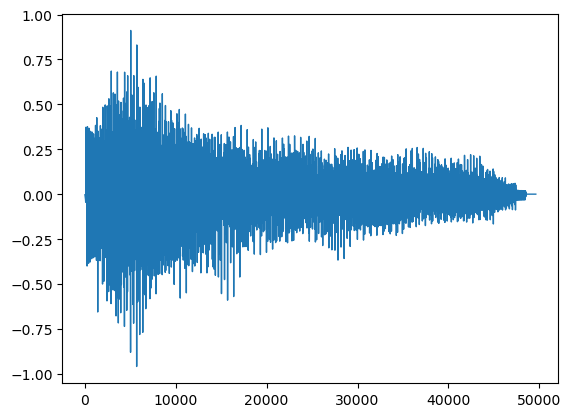

In [6]:
pd.Series(y).plot(lw=1);

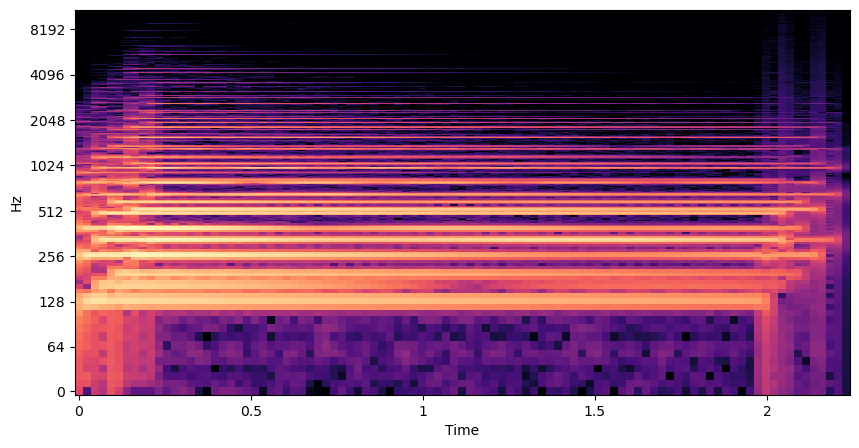

In [7]:
# code used from Rob Mulla https://www.youtube.com/watch?v=ZqpSb5p1xQo&t=809s
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db, x_axis = 'time', y_axis='log', ax=ax)